In [1]:
import os
os.getcwd()

'/Users/nyreemarsh/Library/Mobile Documents/com~apple~CloudDocs/everything/university - year 2/BASC0005/map_codes'

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import geopandas as gpd

## Import & clean data

In [4]:
#read dataset
data_brazil = pd.read_csv('Brazil_by_location.csv')
data_brazil.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,4760,Minas Gerais,3,Both,22,All ages,976,Diabetes mellitus type 2,1,Number,1990,25444.552390,27962.375796,23103.977666
1,6,Incidence,4760,Minas Gerais,3,Both,22,All ages,976,Diabetes mellitus type 2,2,Percent,1990,0.000244,0.000275,0.000216
2,6,Incidence,4760,Minas Gerais,3,Both,22,All ages,976,Diabetes mellitus type 2,3,Rate,1990,159.293322,175.055928,144.640365
3,6,Incidence,4760,Minas Gerais,3,Both,22,All ages,976,Diabetes mellitus type 2,1,Number,1991,25477.822540,27777.992896,23263.197199
4,6,Incidence,4760,Minas Gerais,3,Both,22,All ages,976,Diabetes mellitus type 2,2,Percent,1991,0.000243,0.000271,0.000215


In [5]:
#clean data - obtain value in rate
temp = data_brazil[(data_brazil['cause_name']=='Diabetes mellitus type 2') & 
                   (data_brazil['metric_name']=='Rate')]
temp=temp.drop(['cause_id','cause_name',
                'metric_id','metric_name',
                'age_name', 'age_id', 'sex_id', 'sex_name',
                'measure_name','measure_id'],
          axis=1)

In [6]:
diabetes_df = temp[temp['year']==2018]
diabetes_df.head()

,location_id,location_name,year,val,upper,lower
160,4757,Espírito Santo,2018,304.030306,332.849734,275.880058
266,4760,Minas Gerais,2018,274.542377,302.988698,248.369523
356,4763,Pará,2018,252.413330,274.511979,231.536189
716,4766,Pernambuco,2018,335.431844,366.585383,306.037437
986,4769,Rio Grande do Norte,2018,325.821539,357.152315,298.411488


In [7]:
all_province = list(diabetes_df['location_name'].unique())
all_province

['Espírito Santo',
 'Minas Gerais',
 'Pará',
 'Pernambuco',
 'Rio Grande do Norte',
 'Amazonas',
 'Paraíba',
 'São Paulo',
 'Acre',
 'Rio Grande do Sul',
 'Ceará',
 'Paraná',
 'Alagoas',
 'Goiás',
 'Piaui',
 'Mato Grosso do Sul',
 'Amapá',
 'Rondônia',
 'Distrito Federal',
 'Tocantins',
 'Santa Catarina',
 'Mato Grosso',
 'Rio de Janeiro',
 'Bahia',
 'Maranhão',
 'Sergipe',
 'Roraima']

Import geographical information & plot
shapefile from https://geodata.lib.berkeley.edu/catalog/stanford-fk191sw2939

In [8]:
my_shapefile = 'shapefile/fk191sw2939.shp'
my_map = gpd.read_file(my_shapefile)

In [9]:
brazil_map = my_map[my_map['adm1_code'].str.startswith('BRA')]
brazil_map.head()

,featurecla,scalerank,adm1_code,geometry
10,Admin-1 scale rank,2.0,BRA-576,"POLYGON ((-66.62767 -9.92525, -66.62767 -9.925..."
11,Admin-1 scale rank,2.0,BRA-595,"POLYGON ((-59.89117 -12.24455, -59.82412 -12.3..."
13,Admin-1 scale rank,2.0,BRA-670,"POLYGON ((-58.96642 1.30247, -58.86877 0.22428..."
14,Admin-1 scale rank,2.0,BRA-600,"POLYGON ((-51.03405 -19.36940, -50.96430 -19.5..."
15,Admin-1 scale rank,2.0,BRA-592,"POLYGON ((-56.40097 -2.33622, -56.39107 -2.391..."


In [12]:
# substitute name in the map
# set up dictionary to map area code to area name
dict_brazil = {
    'BRA-592':'Amazonas',
    'BRA-576':'Acre',
    'BRA-670':'Roraima',
    'BRA-594':'Pará',
    'BRA-681':'Amapá',
    'BRA-595':'Rondônia',
    'BRA-602':'Mato Grosso',
    'BRA-1294':'Goiás',
    'BRA-681':'Amapá',
    'BRA-593':'Maranhão',
    'BRA-622':'Piaui',
    'BRA-621':'Ceará',
    'BRA-628':'Rio Grande do Norte',
    'BRA-626':'Paraíba',
    'BRA-1313':'Pernambuco',
    'BRA-623':'Alagoas',
    'BRA-629':'Sergipe',
    'BRA-624':'Bahia',
    'BRA-601':'Minas Gerais',
    'BRA-625':'Espírito Santo',
    'BRA-627':'Rio de Janeiro',
    'BRA-1311':'São Paulo',
    'BRA-613':'Paraná',
    'BRA-614':'Santa Catarina',
    'BRA-612':'Rio Grande do Sul',
    'BRA-600':'Mato Grosso do Sul',
    'BRA-596':'Tocantins',
    'BRA-599':'Distrito Federal'
}

# change area code in .shp file into area name, the same as in the diabetes dataset
brazil_map['location_name']=brazil_map['adm1_code'].apply(lambda x: dict_brazil[x])
brazil_map.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,featurecla,scalerank,adm1_code,geometry,location_name
10,Admin-1 scale rank,2.0,BRA-576,"POLYGON ((-66.62767 -9.92525, -66.62767 -9.925...",Acre
11,Admin-1 scale rank,2.0,BRA-595,"POLYGON ((-59.89117 -12.24455, -59.82412 -12.3...",Rondônia
13,Admin-1 scale rank,2.0,BRA-670,"POLYGON ((-58.96642 1.30247, -58.86877 0.22428...",Roraima
14,Admin-1 scale rank,2.0,BRA-600,"POLYGON ((-51.03405 -19.36940, -50.96430 -19.5...",Mato Grosso do Sul
15,Admin-1 scale rank,2.0,BRA-592,"POLYGON ((-56.40097 -2.33622, -56.39107 -2.391...",Amazonas


In [13]:
temp['year']

2       1990
5       1991
8       1992
11      1993
14      1994
        ... 
4847    2015
4850    2016
4853    2017
4856    2018
4859    2019
Name: year, Length: 810, dtype: int64

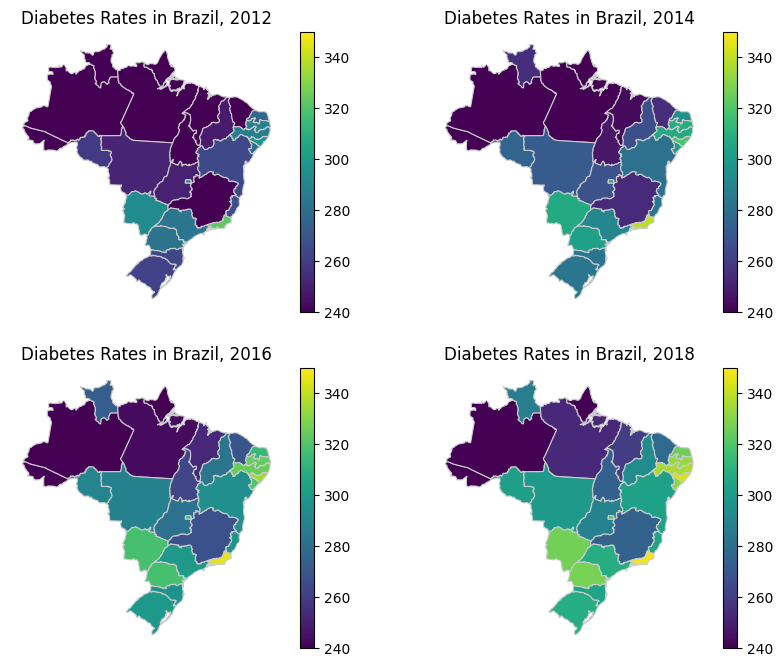

In [14]:
year_list = [2012, 2014, 2016, 2018]
fig = plt.figure(figsize=(10, 8))

for iYear in range(len(year_list)):
    diabetes_df = temp[temp['year']==year_list[iYear]]
    merged_df = brazil_map.merge(diabetes_df, left_on="location_name", right_on="location_name")

    ax = plt.subplot(2,2,iYear+1)
    merged_df.plot(ax=ax, 
                   column="val", 
                   linewidth=0.8, 
                   edgecolor="0.8", 
                   legend=True,
                   vmin=240,
                   vmax=350)

    ax.set_title("Diabetes Rates in Brazil, "+str(year_list[iYear]))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')
    
    plt.xticks([])
    plt.yticks([])

# plt.savefig('brazil_map_spatialTemporal.png')
plt.show()

/var/folders/xt/40yqc8kx5z36w2d8jh4qqm600000gn/T/ipykernel_44415/1192098410.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


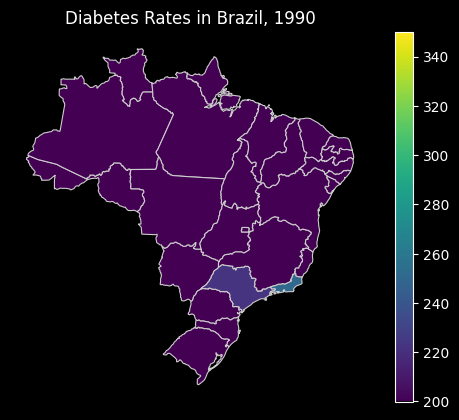

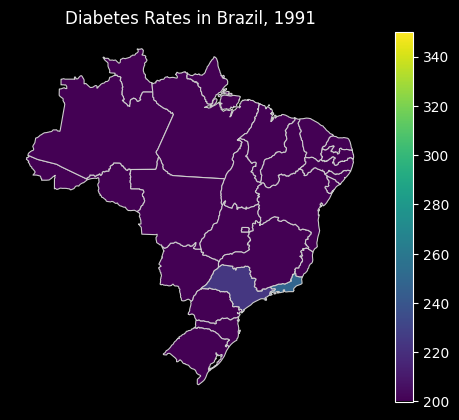

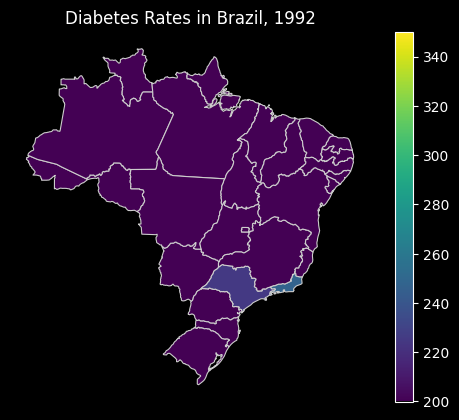

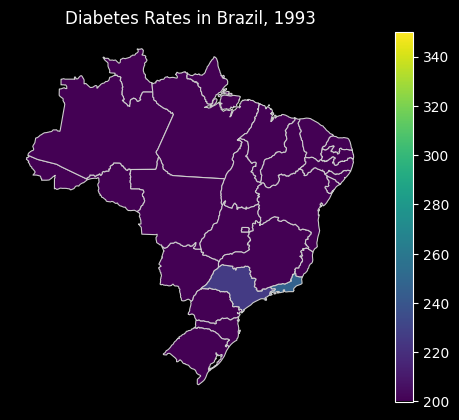

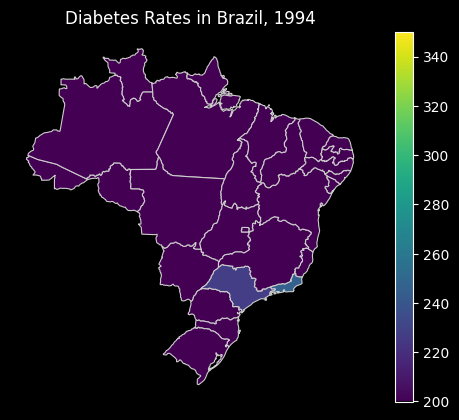

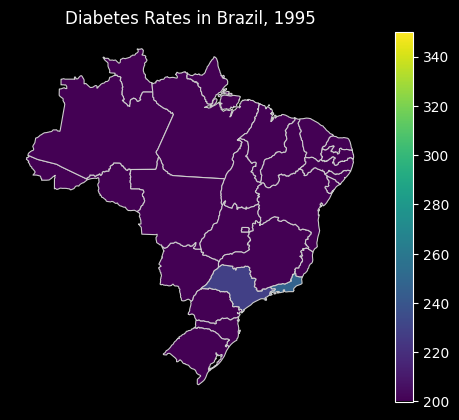

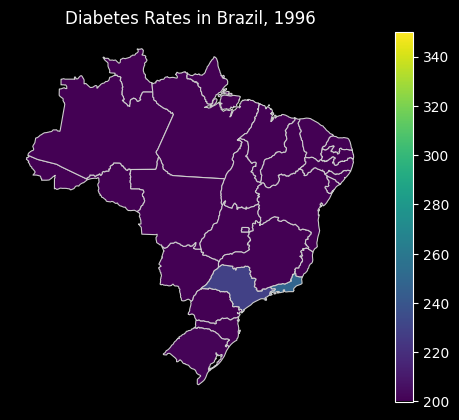

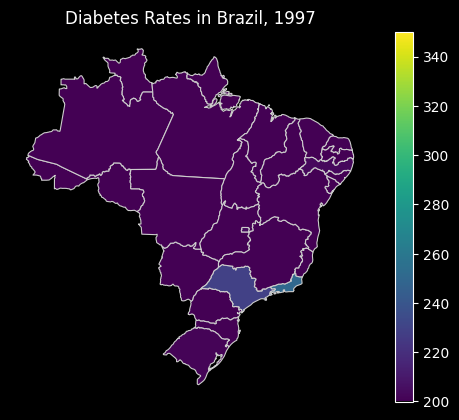

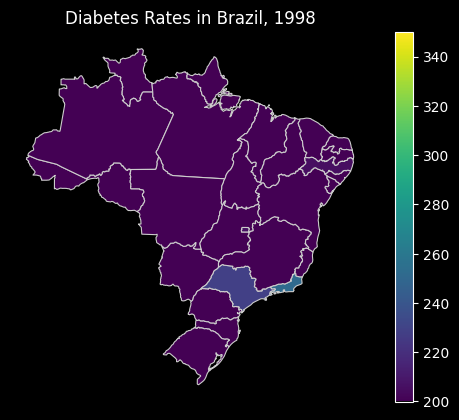

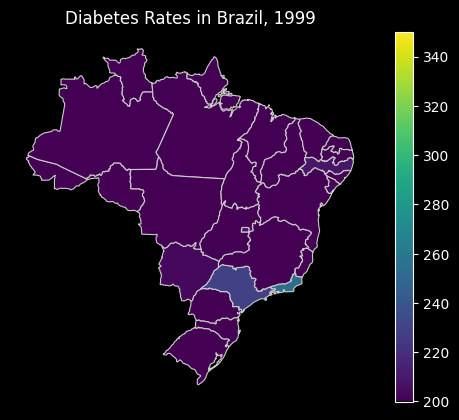

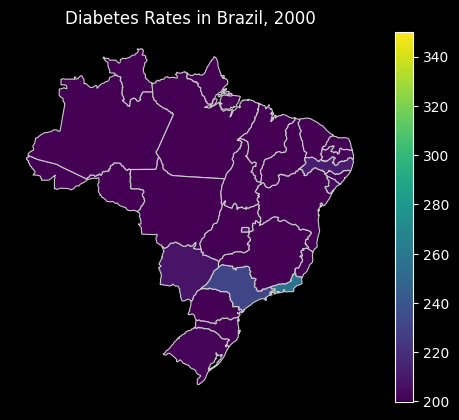

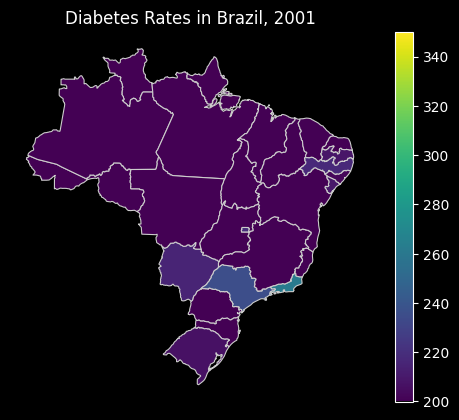

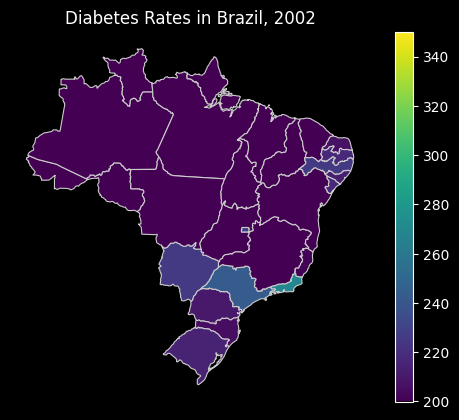

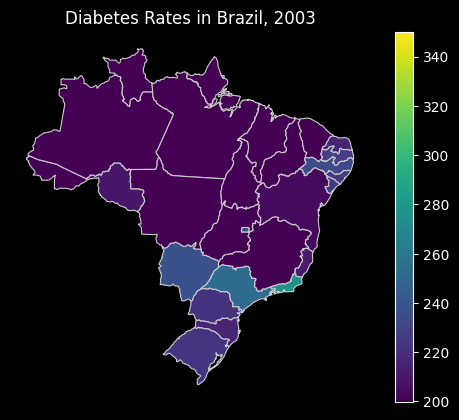

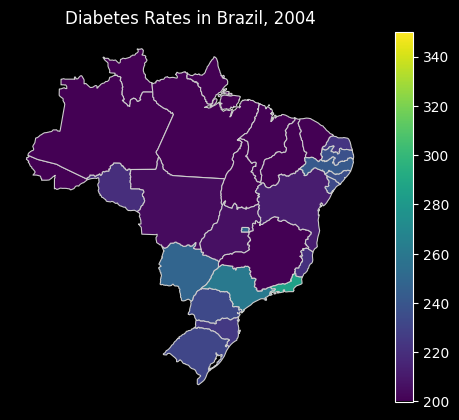

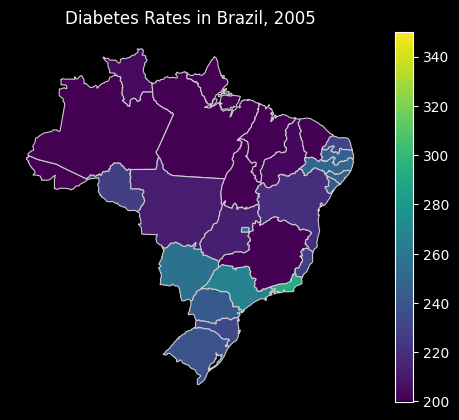

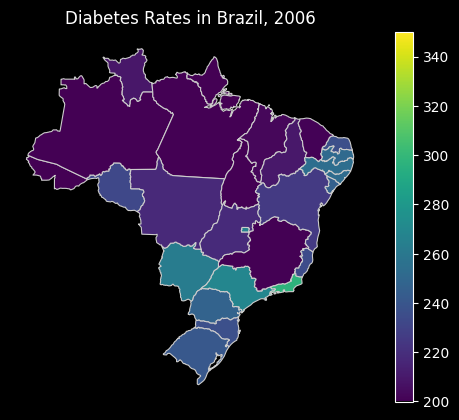

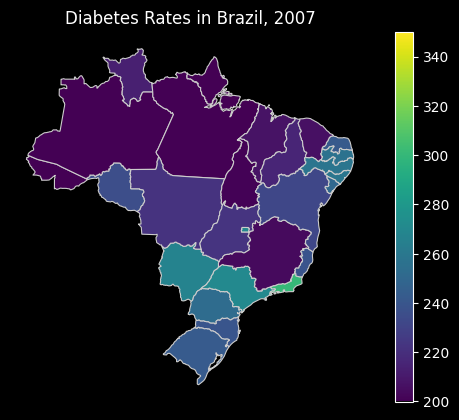

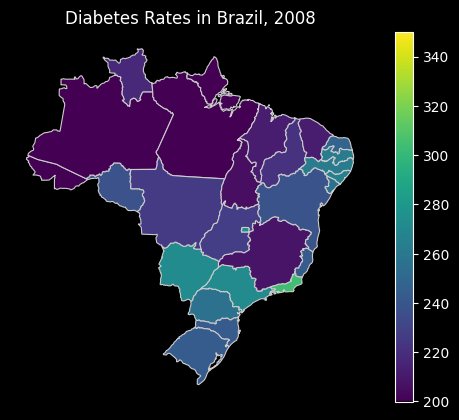

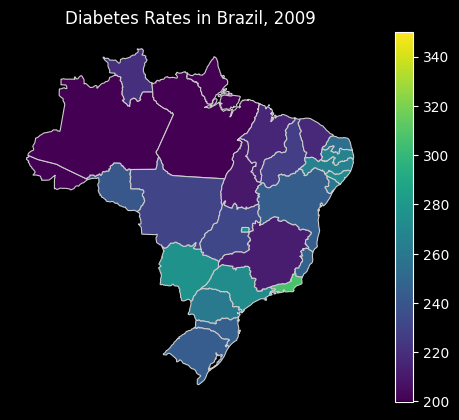

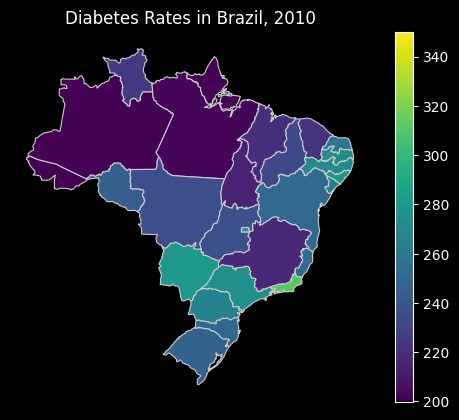

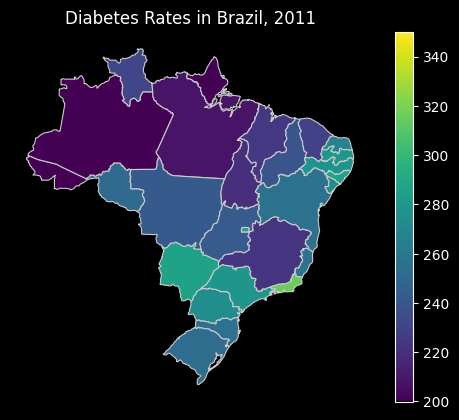

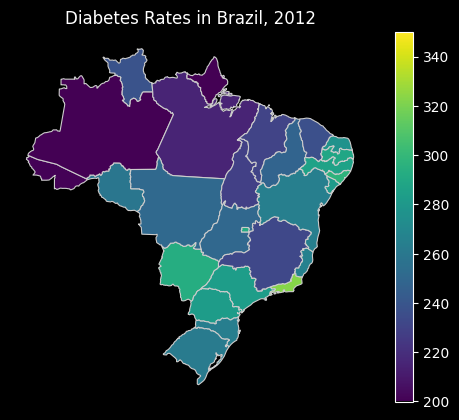

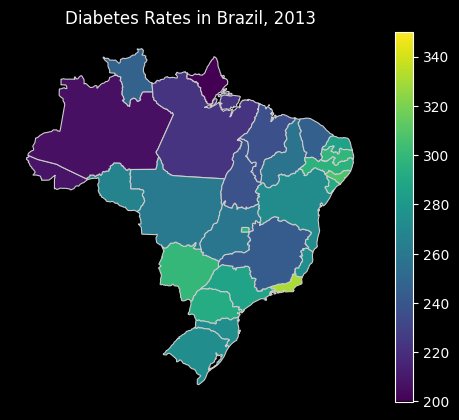

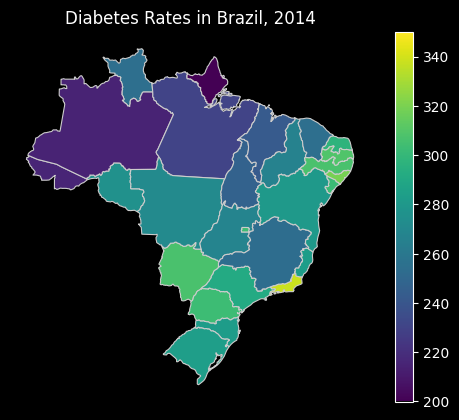

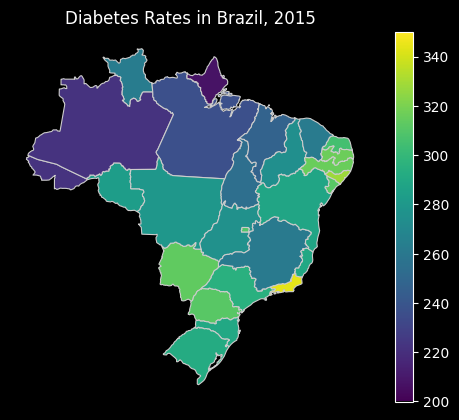

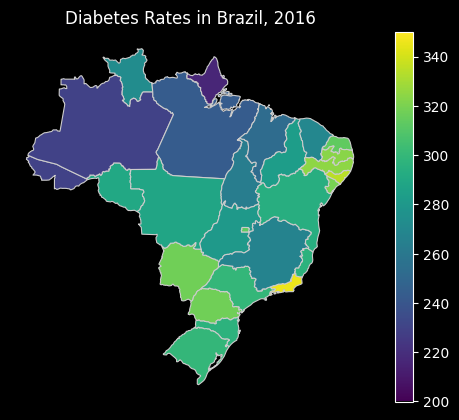

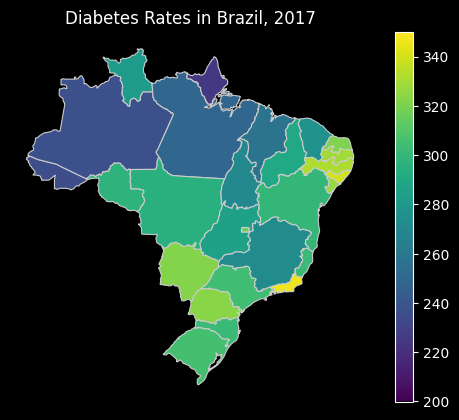

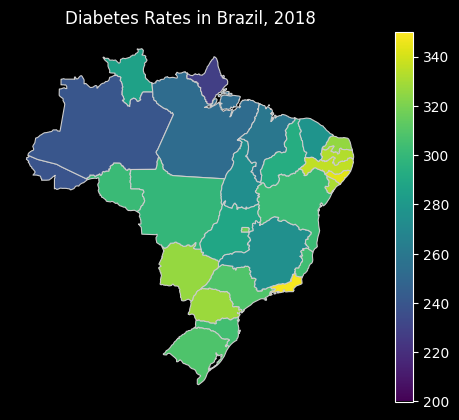

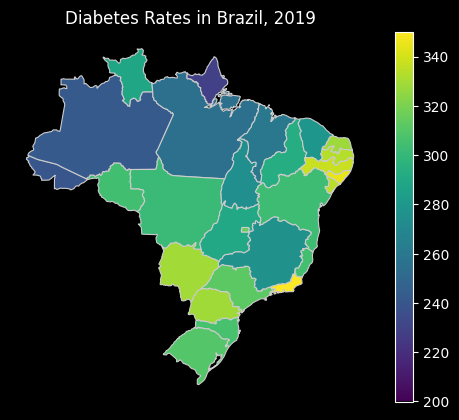

In [18]:
year_list = [i for i in range(1990, 2020)]

plt.style.use('dark_background')


for iYear in range(len(year_list)):
    fig, ax = plt.subplots()
    diabetes_df = temp[temp['year']==year_list[iYear]]
    merged_df = brazil_map.merge(diabetes_df, left_on="location_name", right_on="location_name")

    merged_df.plot(ax=ax, 
                   column="val", 
                   linewidth=0.8, 
                   edgecolor="0.8", 
                   legend=True,
                   vmin=200,
                   vmax=350)

    ax.set_title("Diabetes Rates in Brazil, "+str(year_list[iYear]))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')
    
    plt.xticks([])
    plt.yticks([])
    plt.savefig('brazil_map_spatialTemporal'+str(iYear)+'.png')


In [12]:
temp['year']

2       1990
5       1991
8       1992
11      1993
14      1994
        ... 
4847    2015
4850    2016
4853    2017
4856    2018
4859    2019
Name: year, Length: 810, dtype: int64